In [1]:
import pandas as pd

REDDIT = "data/reddit_Battlefield_comments_2025-08-19_16-54-08.csv"
ANEW = "data/anew.csv"

df_reddit = pd.read_csv(REDDIT)
df_anew = pd.read_csv(ANEW)

In [2]:
df_reddit.head()

,subreddit,post_id,post_title,post_index_in_hot,post_permalink,comment_id,author,body,score,created_utc,parent_id,is_submitter
0,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7fpio8,djdelight,"Add ""request orders"" so you become squad leade...",192,1.754581e+09,t3_1mk0tn7,False
1,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7f6zfl,ArcadianEuphoria,"The settings menu is very clunky (PS5), the se...",247,1.754576e+09,t3_1mk0tn7,False
2,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7f7e2b,aPriori07,Show revives on the main scoreboard.,376,1.754576e+09,t3_1mk0tn7,False
3,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7ftric,Redlodger0426,I wish health was on the right side of the hud...,65,1.754583e+09,t3_1mk0tn7,False
4,Battlefield,1mk0tn7,Battlefield 6 Open Beta: Feedback Megathread,1,https://www.reddit.com/r/Battlefield/comments/...,n7fg8it,speedballandcrack,Non squad team mates should have class symbols...,123,1.754579e+09,t3_1mk0tn7,False


In [3]:
comment = df_reddit['post_title'].unique()
print(comment)

['Battlefield 6 Open Beta: Feedback Megathread'
 'BF1 atmosphere still beats BF6'
 'who else mained the AK-205 during the beta?'
 'It looks like many people here don’t know how closed weapons work so here is the graph. No, playing as a support doesn’t mean you have to run around with an LMG.'
 'My experience 😂 still love battlefield though.'
 'Returned to BF3 to do a nostalgia reality check after 46 hours of BF6 beta']


In [4]:
df_anew = df_anew.copy()
df_anew["term"] = df_anew["term"].astype(str).str.strip().str.lower()
anew_terms = set(df_anew["term"])

s = df_reddit["body"].astype(str).str.lower()
s = s.str.replace(r"http\S+|www\.\S+", " ", regex=True)
s = s.str.replace(r"[^a-z\s']", " ", regex=True)
s = s.str.replace("'", "", regex=False)
tokens = s.str.split()

words = tokens.explode().dropna()
words = words[words.isin(anew_terms)]

anew_counts = words.value_counts().rename_axis("term").reset_index(name="count")

cols_scores = [c for c in df_anew.columns if c != "term"]
anew_counts_with_scores = anew_counts.merge(
    df_anew[["term"] + cols_scores], on="term", how="left"
)

anew_counts.head(20), anew_counts_with_scores.head(20)


(           term  count
 0          game    198
 1          good     96
 2          time     75
 3        people     70
 4        damage     59
 5        weapon     51
 6       assault     49
 7           gun     46
 8           fun     40
 9        health     30
 10          hit     30
 11       pretty     26
 12         love     26
 13  destruction     21
 14      grenade     20
 15        loved     20
 16         hope     18
 17         fire     18
 18          war     16
 19         nice     16,
            term  count   pleasure    arousal  dominance
 0          game    198  79.138322  66.780045  64.625850
 1          good     96  84.693878  61.564626  72.675737
 2          time     75  60.204082  52.607710  52.494331
 3        people     70  83.106576  67.346939  69.614512
 4        damage     59  34.580499  63.151927  43.990930
 5        weapon     51  45.011338  68.367347  58.843537
 6       assault     49  23.015873  85.147392  44.671202
 7           gun     46  39.342404  79.

In [5]:
total_count = anew_counts_with_scores["count"].sum()

pleasure_mean = (anew_counts_with_scores["pleasure"] * anew_counts_with_scores["count"]).sum() / total_count
arousal_mean  = (anew_counts_with_scores["arousal"]  * anew_counts_with_scores["count"]).sum() / total_count
domin_mean    = (anew_counts_with_scores["dominance"]* anew_counts_with_scores["count"]).sum() / total_count

print("Pontuação média nos comentários:")
print(f"Pleasure  : {pleasure_mean:.2f}")
print(f"Arousal   : {arousal_mean:.2f}")
print(f"Dominance : {domin_mean:.2f}")


Pontuação média nos comentários:
Pleasure  : 64.11
Arousal   : 63.94
Dominance : 59.97


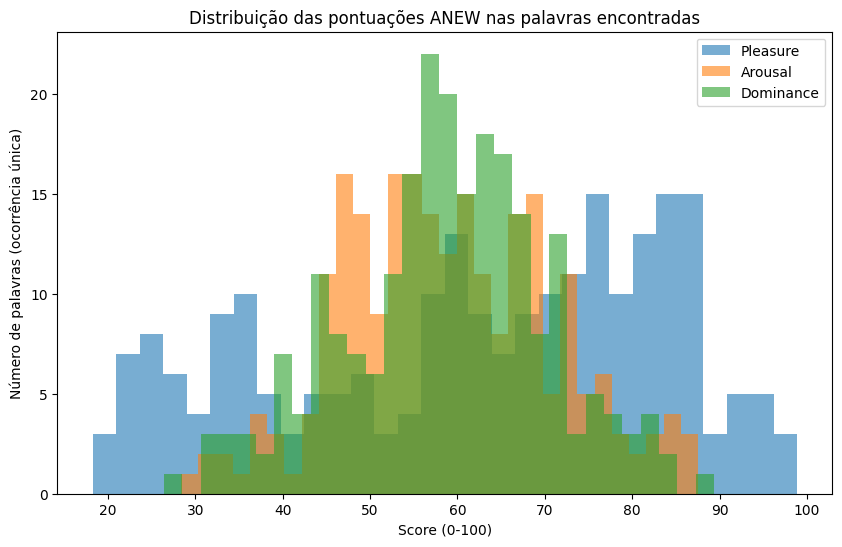

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(anew_counts_with_scores["pleasure"].dropna(), bins=30, alpha=0.6, label="Pleasure")
plt.hist(anew_counts_with_scores["arousal"].dropna(), bins=30, alpha=0.6, label="Arousal")
plt.hist(anew_counts_with_scores["dominance"].dropna(), bins=30, alpha=0.6, label="Dominance")
plt.xlabel("Score (0-100)")
plt.ylabel("Número de palavras (ocorrência única)")
plt.title("Distribuição das pontuações ANEW nas palavras encontradas")
plt.legend()
plt.show()


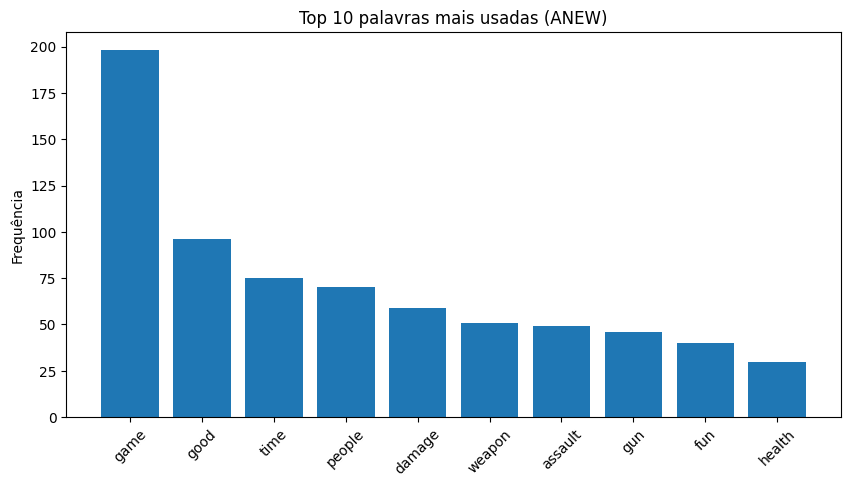

In [7]:
top10 = anew_counts.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10["term"], top10["count"])
plt.xticks(rotation=45)
plt.title("Top 10 palavras mais usadas (ANEW)")
plt.ylabel("Frequência")
plt.show()


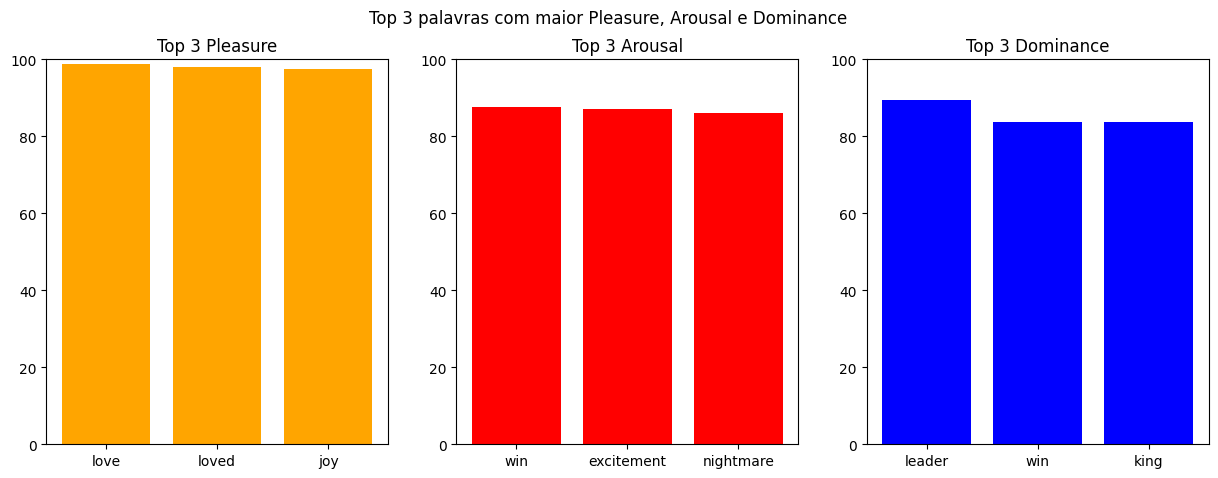

In [8]:
# Top 3 por pleasure
top3_pleasure = anew_counts_with_scores.sort_values("pleasure", ascending=False).head(3)

# Top 3 por arousal
top3_arousal = anew_counts_with_scores.sort_values("arousal", ascending=False).head(3)

# Top 3 por dominance
top3_dominance = anew_counts_with_scores.sort_values("dominance", ascending=False).head(3)

fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].bar(top3_pleasure["term"], top3_pleasure["pleasure"], color="orange")
axs[0].set_title("Top 3 Pleasure")
axs[0].set_ylim(0,100)

axs[1].bar(top3_arousal["term"], top3_arousal["arousal"], color="red")
axs[1].set_title("Top 3 Arousal")
axs[1].set_ylim(0,100)

axs[2].bar(top3_dominance["term"], top3_dominance["dominance"], color="blue")
axs[2].set_title("Top 3 Dominance")
axs[2].set_ylim(0,100)

plt.suptitle("Top 3 palavras com maior Pleasure, Arousal e Dominance")
plt.show()
